# Project: Wrangle and Analyze Data / Victory Osarodion

Table of Contents
Introduction
Gathering Data
Assessing Data
Quality Issues
Tidiness Issues
Clean Data
Test
Storing data
Analyzing and Visualizing data
Conclusion

## Introduction
The aim of this project is to wrangle the WeRateDogs Twitter data to create interesting and insightful analyses and visualizations. This twitter account rates people's dogs with humorous comments. The account received international media coverage and got popular on social media. To complete this project, the data needs to be gathered, assessed and cleaned in order to be analyzed to get insights.

In [1]:
import pandas as pd
import requests as rq
import numpy
import json
import matplotlib.pyplot as plt
%matplotlib inline

## Gathering Data

In [2]:
archive=pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#Getting the image prediction file from the internet programmatically
url =  'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = rq.get(url)
with open('image prediction', mode = 'wb') as file:
    file.write(response.content)

In [4]:
#Plot the image prediction file into a pandas dataframe
Image = pd.read_csv('image prediction',sep ='\t')

In [5]:
Image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [6]:
#Reading the tweet from file line by line
with open('tweet-json.txt','r') as file:
    lines=file.readlines()

In [7]:
Tweet_id=[]
Retweet_count=[]
Favourite_count=[]
for line in lines:
    line_dic = json.loads(line)
    Tweet_id.append(line_dic['id_str'])
    Retweet_count.append(line_dic['retweet_count'])
    Favourite_count.append(line_dic['favorite_count'])

In [8]:
#Check if the tweet was read line by line
len(Retweet_count), len(Tweet_id), len(Favourite_count)

(2354, 2354, 2354)

In [9]:
#Converting the extracted data to a Pandas dataframe
Tweet_dic = {'tweet_id': Tweet_id, 'Retweet_count': Retweet_count, 'Favourite_count': Favourite_count}
tweet_df = pd.DataFrame.from_dict(Tweet_dic)



## ACCESSING DATA
First, the Twitter archive would be accessed and observations noted. Then, the other two data frames would be accessed
## 1. Twitter archive


In [10]:
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


### Quality Issues
1. The  columns, **("in_reply_to_status_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"  and "in_reply_to_user_id")**, have so many NaN values
### Sructural Issues
1. There are four different columns **(doggo, floofer, pupper, and puppo)** that refers to one variable **"dog_stage"**

In [11]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Quality Issues
1. The column, 'tweet_id' has datatype integer instead of strings
2. The column, rating numerator has incorrect values
3. Some of the rows have a rating denominator that is not 10
4. The column timestamp has a data type of string instead of datetime
5. Some of the dog names are not real names

In [12]:
archive.loc[archive['rating_numerator'] > 20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [13]:
archive.expanded_urls[1800]

'https://twitter.com/dog_rates/status/676975532580409345/photo/1'

In [14]:
archive.expanded_urls[1843]

'https://twitter.com/dog_rates/status/675853064436391936/photo/1,https://twitter.com/dog_rates/status/675853064436391936/photo/1'

In [15]:
#Check for duplicates
archive[archive['tweet_id'].duplicated(keep=False)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


## 2. Image Predictions

In [16]:
Image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [17]:
Image.loc[Image['p1_dog'] == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False


### Quality Issues
1. So many columns are not appropriately named like Jpg_url, P1,P1_conf,and others.
2. Some of the names in the dog breed column are in lower case.
3. Some of the dog Images are clearly not dogs, especially those that have all the three predictions as false

In [18]:
Image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
Image.loc[Image['img_num'] > 1]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
144,668623201287675904,https://pbs.twimg.com/media/CUdtP1xUYAIeBnE.jpg,4,Chihuahua,0.708163,True,Pomeranian,0.091372,True,titi,0.067325,False
312,671547767500775424,https://pbs.twimg.com/media/CVHRIiqWEAAj98K.jpg,2,Loafer,0.255088,False,platypus,0.090019,False,cowboy_boot,0.066536,False
315,671735591348891648,https://pbs.twimg.com/media/CVJ79MzW4AEpTom.jpg,2,stone_wall,0.271121,False,Irish_wolfhound,0.063078,True,poncho,0.048226,False
319,671768281401958400,https://pbs.twimg.com/media/CVKZsHtWwAA6gPj.jpg,2,Chihuahua,0.500373,True,French_bulldog,0.112796,True,Italian_greyhound,0.062893,True
345,672272411274932228,https://pbs.twimg.com/media/CVRkLuJWUAAhhYp.jpg,2,pug,0.914685,True,Norwegian_elkhound,0.014982,True,Siamese_cat,0.009221,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2051,887473957103951883,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
2056,888554962724278272,https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg,3,Siberian_husky,0.700377,True,Eskimo_dog,0.166511,True,malamute,0.111411,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True


In [20]:
Image[Image['jpg_url'].duplicated(keep=False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
85,667509364010450944,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1,beagle,0.636169,True,Labrador_retriever,0.119256,True,golden_retriever,0.082549,True
224,670319130621435904,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
241,670444955656130560,https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg,1,English_springer,0.403698,True,Brittany_spaniel,0.347609,True,Welsh_springer_spaniel,0.137186,True
327,671896809300709376,https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg,1,chow,0.243529,True,hamster,0.227150,False,Pomeranian,0.056057,True
382,673320132811366400,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1970,868880397819494401,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True
2051,887473957103951883,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True


### Quality Issues
There are so many duplicates of image Url. Repeated images are not required.

## 3. Tweet Json file 

In [21]:
tweet_df

,tweet_id,Retweet_count,Favourite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [22]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id           2354 non-null object
Retweet_count      2354 non-null int64
Favourite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


#### There is nothing uncommon with the descriptive statistics of this database

### **Quality Issues**

1. All rows relevant to retweets are not needed
2. The  columns, **("in_reply_to_status_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"  and "in_reply_to_user_id")**, have so many NaN values
3. The column, 'tweet_id' has datatype integer instead of strings in both the archive and the Image Perception dataframe
4. The column, rating numerator has incorrect values
5. Drop the duplicates of image Url in Image Perception datframe
6. So many columns are not appropriately named like Jpg_url, P1,P1_conf,and others.
7. Some of the names in the dog breed column are in lower case.
8. Some of the dog Images are clearly not dogs, especially those that have all the three predictions as false
9. The column timestamp has a data type of string instead of datetime
10. Remove row that do not have their ratings denominator as 10to one variable **"dog_stage"**
11. Some of the dog names are not real names

## **Structural Issues**

1. Convert the doggo, floofer, pupper, and puppo columns in the Twitter archive data frame to one column "DogStage".
3. Merge datasets

## Clean
### Quality Issues

In [23]:
# Create a copy of each dataset to be cleaned
archive_clean = archive.copy()
Image_clean = Image.copy()
tweet_df_clean =tweet_df.copy()

### Define
1. Drop all rows relevant to retweet

### Code

In [24]:
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]

### Test

In [25]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

### Define
2. Drop all columns with too many nan values and columns that would not be useful in the analysis

### Code

In [26]:
archive_clean.isnull().mean()*100

tweet_id                        0.000000
in_reply_to_status_id          96.413793
in_reply_to_user_id            96.413793
timestamp                       0.000000
source                          0.000000
text                            0.000000
retweeted_status_id           100.000000
retweeted_status_user_id      100.000000
retweeted_status_timestamp    100.000000
expanded_urls                   2.666667
rating_numerator                0.000000
rating_denominator              0.000000
name                            0.000000
doggo                           0.000000
floofer                         0.000000
pupper                          0.000000
puppo                           0.000000
dtype: float64

In [27]:
archive_clean.drop(["in_reply_to_status_id", "retweeted_status_id", "retweeted_status_user_id","expanded_urls","source", "retweeted_status_timestamp", "in_reply_to_user_id"], axis = 1, inplace = True)

### Test

In [28]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(7)
memory usage: 186.9+ KB


### Define
3. Change the Tweet_id data type to string in both the archive and the Image Perception dataframe

### Code

In [29]:
archive_clean['tweet_id']=archive_clean['tweet_id'].astype(str)
Image_clean['tweet_id']=archive_clean['tweet_id'].astype(str)

### Test

In [30]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(2), object(8)
memory usage: 266.9+ KB


In [31]:
Image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    1896 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Define
4. Correct the rating numerator values

### Code

In [32]:
ratings = archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
archive_clean.rating_numerator = ratings

### Test

In [33]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null object
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(1), object(9)
memory usage: 266.9+ KB


### Define
5. Drop the duplicates of image URL in Image Perception dataframe

### Code

In [34]:
Image_clean = Image_clean.drop_duplicates(subset =['jpg_url'], keep = 'last')

### Test

In [35]:
Image_clean[Image_clean['jpg_url'].duplicated(keep = False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Define
6. Rename columns with non descriptive column names

### Code

In [36]:
Image_clean = Image_clean.rename(columns={'jpg_url' : 'image_url',
                                          'img_num' : 'image_number',
                                          'p1' : 'top_prediction',
                                          'p1_conf' : 'top_pred_conf',
                                          'p2' : 'second_prediction',
                                          'p2_conf' : 'second_pred_conf',
                                          'p3' : 'third_prediction',
                                          'p3_conf' : 'third_pred_conf',
                                          'p1_dog' : 'dog_top_pred',
                                          'p2_dog' : 'dog_sec_pred',
                                          'p3_dog': 'dog_third_pred'
                                         })

### Test

In [37]:
Image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id             1834 non-null object
image_url            2009 non-null object
image_number         2009 non-null int64
top_prediction       2009 non-null object
top_pred_conf        2009 non-null float64
dog_top_pred         2009 non-null bool
second_prediction    2009 non-null object
second_pred_conf     2009 non-null float64
dog_sec_pred         2009 non-null bool
third_prediction     2009 non-null object
third_pred_conf      2009 non-null float64
dog_third_pred       2009 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 162.8+ KB


### Define
6 Change all the names in the Dog breed column of the Image Perception dataframe to Title case

### Code

In [38]:
Image_clean.top_prediction = Image_clean['top_prediction'].str.title()
Image_clean.second_prediction = Image_clean['second_prediction'].str.title()
Image_clean.third_prediction = Image_clean['third_prediction'].str.title()

In [39]:
# Remove the " _ " between words from the images dataset (to make it more readable)
Image_clean.top_prediction = Image_clean.top_prediction.str.replace('_',' ')
Image_clean.second_prediction = Image_clean.second_prediction.str.replace('_',' ')
Image_clean.third_prediction = Image_clean.third_prediction.str.replace('_',' ')

### Test

In [40]:
img = Image_clean[['top_prediction','second_prediction','third_prediction']]
img.head(10)

,top_prediction,second_prediction,third_prediction
0,Welsh Springer Spaniel,Collie,Shetland Sheepdog
1,Redbone,Miniature Pinscher,Rhodesian Ridgeback
2,German Shepherd,Malinois,Bloodhound
3,Rhodesian Ridgeback,Redbone,Miniature Pinscher
4,Miniature Pinscher,Rottweiler,Doberman
5,Bernese Mountain Dog,English Springer,Greater Swiss Mountain Dog
6,Box Turtle,Mud Turtle,Terrapin
7,Chow,Tibetan Mastiff,Fur Coat
8,Shopping Cart,Shopping Basket,Golden Retriever
9,Miniature Poodle,Komondor,Soft-Coated Wheaten Terrier


### Define
8. Drop the rows that has all the three dog predictions as False

### Code

In [41]:
Image_clean = Image_clean[(Image_clean.dog_top_pred == True) | (Image_clean.dog_sec_pred == True) | (Image_clean.dog_third_pred == True)]

### Test

In [42]:
assert Image_clean[(Image_clean.dog_top_pred == False) & (Image_clean.dog_sec_pred == False) & (Image_clean.dog_third_pred == False)].tweet_id.count() == 0

### Define
9. Convert the timestamp column to Datetime Index

### Code

In [43]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

### Test

In [44]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns, UTC]
text                  2175 non-null object
rating_numerator      2175 non-null object
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns, UTC](1), int64(1), object(8)
memory usage: 266.9+ KB


### Define
10. Drop all rows that do not have rating denominator as 10

### Code

In [45]:
archive_clean = archive_clean.loc[archive_clean['rating_denominator'] == 10]

### Test

In [46]:
archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


In [47]:
# Drop rating_denominator, since it is no longer needed
archive_clean.drop(columns =['rating_denominator'], inplace = True)
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id            2153 non-null object
timestamp           2153 non-null datetime64[ns, UTC]
text                2153 non-null object
rating_numerator    2153 non-null object
name                2153 non-null object
doggo               2153 non-null object
floofer             2153 non-null object
pupper              2153 non-null object
puppo               2153 non-null object
dtypes: datetime64[ns, UTC](1), object(8)
memory usage: 168.2+ KB


In [48]:
# Change the rating numerator's name to ratings
archive_clean.rename(columns={'rating_numerator':'ratings'},inplace = True)

### Define
11. Change all dog names that are not real to None
### Code

In [49]:
archive_clean.name[archive_clean.name.str.islower()] = archive_clean[archive_clean.name.str.islower()].name.str.replace(r'^[a-z]+', 'None', regex=True)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Test

In [50]:
archive_clean.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352        None
2353        None
2354        None
2355        None
Name: name, Length: 2153, dtype: object

### Test

## Structural Issues

### Define
1. Convert the doggo, floofer, pupper, and puppo columns in the Twitter archive data frame to one column "DogStage".

### Code

In [51]:
archive_clean['DogStage'] = archive_clean['doggo']+archive_clean['floofer']+archive_clean['pupper']+archive_clean['puppo']

In [52]:
# Now, let's drop the columns that are not needed
archive_clean.drop(columns=["doggo","floofer","pupper","puppo"], axis=1, inplace=True)

In [53]:
# Now, let's make the DogStage column more presentable
archive_clean['DogStage'].replace("NoneNoneNoneNone","None ", inplace=True)
archive_clean['DogStage'].replace("doggoNoneNoneNone","doggo", inplace=True)
archive_clean['DogStage'].replace("NoneflooferNoneNone","floofer", inplace=True)
archive_clean['DogStage'].replace("NoneNonepupperNone","pupper", inplace=True)
archive_clean['DogStage'].replace("NoneNoneNonepuppo","puppo", inplace=True)
archive_clean['DogStage'].replace("doggoNoneNonepuppo","doggo_puppo", inplace=True)
archive_clean['DogStage'].replace("doggoNonepupperNone","doggo_pupper", inplace=True)
archive_clean['DogStage'].replace("doggoflooferNoneNone","doggo_floofer", inplace=True)

### Test

In [54]:
archive_clean.DogStage.value_counts()

None             1809
pupper            224
doggo              75
puppo              24
doggo_pupper       10
floofer             9
doggo_floofer       1
doggo_puppo         1
Name: DogStage, dtype: int64

### Define
2. Merge Datasets

### Code

In [55]:
Master_df = pd.merge(archive_clean,Image_clean, on = ['tweet_id'], how = 'left')
Master_df = pd.merge(Master_df, tweet_df, on = ['tweet_id'], how = 'left')

### Test

In [56]:
Master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2152
Data columns (total 19 columns):
tweet_id             2153 non-null object
timestamp            2153 non-null datetime64[ns, UTC]
text                 2153 non-null object
ratings              2153 non-null object
name                 2153 non-null object
DogStage             2153 non-null object
image_url            1538 non-null object
image_number         1538 non-null float64
top_prediction       1538 non-null object
top_pred_conf        1538 non-null float64
dog_top_pred         1538 non-null object
second_prediction    1538 non-null object
second_pred_conf     1538 non-null float64
dog_sec_pred         1538 non-null object
third_prediction     1538 non-null object
third_pred_conf      1538 non-null float64
dog_third_pred       1538 non-null object
Retweet_count        2153 non-null int64
Favourite_count      2153 non-null int64
dtypes: datetime64[ns, UTC](1), float64(4), int64(2), object(12)
memory usage: 3

Cleaning Operation Completed

## Storing Data

In [57]:
Master_df.to_csv('twitter_archive_master.csv', index = False)

## Analysing and Visualizing Data

In [58]:
Master_df.describe()

,image_number,top_pred_conf,second_pred_conf,third_pred_conf,Retweet_count,Favourite_count
count,1538.000000,1538.000000,1538.000000,1.538000e+03,2153.000000,2153.000000
mean,1.228218,0.610591,0.136341,6.082631e-02,2765.149559,8781.681839
std,0.591028,0.264915,0.100523,5.138212e-02,4656.921008,12091.587021
min,1.000000,0.044333,0.000010,2.160900e-07,0.000000,52.000000
25%,1.000000,0.382406,0.054359,1.598680e-02,608.000000,1896.000000
50%,1.000000,0.610877,0.121376,4.947920e-02,1343.000000,4077.000000
75%,1.000000,0.855685,0.199369,9.475105e-02,3224.000000,11117.000000
max,4.000000,0.999984,0.467678,2.734190e-01,79515.000000,132810.000000


Questions leading to Insights
1. What is the most common dog name?
2. Which dog has the highest rating?
3. What is the most common dog type?
4. What is the  relationship between the favourite count and retweet count of dog tweets?

In [59]:
# 1. What is the most common dog name?
Master_df['name'].value_counts()[:10]

None       765
Lucy        11
Charlie     11
Cooper      10
Oliver      10
Tucker       9
Penny        9
Winston      8
Lola         8
Sadie        8
Name: name, dtype: int64

Insight 1: Charlie and Lucy, are the most common dog names with 11 appearances each.
Majority of the dogs posted were not given names. Those with None have 765 appearances
Does this mean that they were not loved? Let's see the texts they have

In [60]:
Master_df.loc[Master_df['name'] == 'None','text'][:10]

5     Here we have a majestic great white breaching ...
7     When you watch your owner call another dog a g...
12    Here's a puppo that seems to be on the fence a...
21    I've yet to rate a Venezuelan Hover Wiener. Th...
23    You may not have known you needed to see this ...
24    This... is a Jubilant Antarctic House Bear. We...
29    @NonWhiteHat @MayhewMayhem omg hello tanner yo...
33    I have a new hero and his name is Howard. 14/1...
34    Here we have a corgi undercover as a malamute....
38    I present to you, Pup in Hat. Pup in Hat is gr...
Name: text, dtype: object

 From the information above, a large number of the dogs rated do not have names, but this does not indicate that they do not have good qualities.. It is probably an omission.

In [61]:
# Change the data type to a float
Master_df.ratings = Master_df.ratings.astype(float)

In [62]:
# 2. Which dog has the highest rating?
Master_df.loc[Master_df['ratings'].max()]

tweet_id                                            672995267319328768
timestamp                                    2015-12-05 04:25:50+00:00
text                 This is Pumpkin. He can look in two different ...
ratings                                                              8
name                                                           Pumpkin
DogStage                                                         None 
image_url              https://pbs.twimg.com/media/DBP1asiUAAEKZI5.jpg
image_number                                                         2
top_prediction                              Greater Swiss Mountain Dog
top_pred_conf                                                 0.622752
dog_top_pred                                                      True
second_prediction                                          Appenzeller
second_pred_conf                                              0.158463
dog_sec_pred                                                      True
third_

Insight 2:  The dog with the highest rating is Pumpkin. It is an Greater_Swiss_Mountain_Dog.

In [63]:
Master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2152
Data columns (total 19 columns):
tweet_id             2153 non-null object
timestamp            2153 non-null datetime64[ns, UTC]
text                 2153 non-null object
ratings              2153 non-null float64
name                 2153 non-null object
DogStage             2153 non-null object
image_url            1538 non-null object
image_number         1538 non-null float64
top_prediction       1538 non-null object
top_pred_conf        1538 non-null float64
dog_top_pred         1538 non-null object
second_prediction    1538 non-null object
second_pred_conf     1538 non-null float64
dog_sec_pred         1538 non-null object
third_prediction     1538 non-null object
third_pred_conf      1538 non-null float64
dog_third_pred       1538 non-null object
Retweet_count        2153 non-null int64
Favourite_count      2153 non-null int64
dtypes: datetime64[ns, UTC](1), float64(5), int64(2), object(11)
memory usage: 

In [64]:
# How many tweets were posted per year?
Master_df['Year'] = Master_df['timestamp'].dt.year
x = Master_df['Year'].value_counts()

Text(0, 0.5, 'Count')

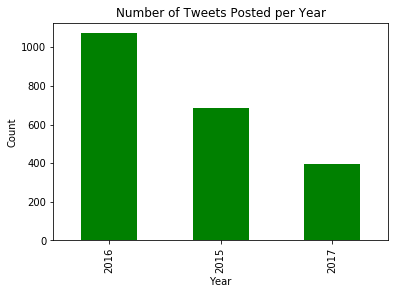

In [65]:
# Let us see this in a bar chart
x.plot.bar(color = 'green')
plt.title('Number of Tweets Posted per Year')
plt.xlabel('Year')
plt.ylabel('Count')

Insight 3: From this chart, it is observed that 2016 had the highest number of tweets.

Text(0, 0.5, 'Favourite_count')

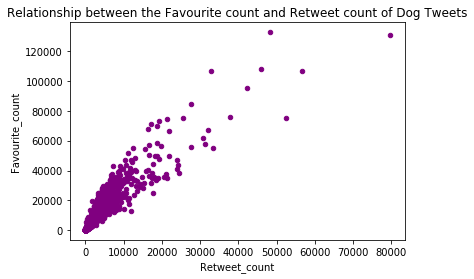

In [66]:
# Let's see the relationship between favourite count and retweet count
Master_df[['Retweet_count','Favourite_count']].plot.scatter(x = 'Retweet_count', y = 'Favourite_count', color ='purple')
plt.title('Relationship between the Favourite count and Retweet count of Dog Tweets')
plt.xlabel('Retweet_count')
plt.ylabel('Favourite_count')

Insight 4: From this diagram, favourite count has a positive correlation with retweet count. It increases as the retweet count increases. This means that any dog tweet loved and appreciated by the audience, had the abilty to be retweeted by as many twitter users who love the tweet.

## Conclusion
WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. The account was started in 2015 by college student Matt Nelson. A large number of the dogs rated do not have names, but this does not indicate that they do not have good qualities. Charlie and Lucy, are the most common dog names with 11 appearances each. The dog with the highest rating is Pumpkin, a Greater Swiss Mountain Dog. The highest number of tweets was recorded in 2016. Also, the number of favourite count a tweet gets has a positive correlation with it's retweet count. The data collected ranges between 2015 and 2017.

## References
1. Udacity
2. Stack overflow
3. Pandas documentation
4. Geeks for Geeks